In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
# Read CSV into a DataFrame
csv_path = "SHR76_17.csv"
murder_df = pd.read_csv(csv_path)
murder_df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Alaska,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,Alabama,"Mobile, AL"


In [3]:
# Clean data up!
murder_weapons_series = murder_df['Weapon']

# Combine Gun categories
murder_weapons_series = murder_weapons_series.replace(to_replace=['Rifle', 'Handgun', 'Firearm', 'Shotgun', 'Other Gun', 'Handgun - pistol, revolver, etc', 'Firearm, type not stated', 'Other gun'], value='Gun')
murder_df = murder_df.assign(Weapon=murder_weapons_series)

# Combine Circumstances
murder_circumstance_series = murder_df['Circumstance']
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Other arguments', 'Argument over money or property'], value='Arguments')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Other negligent handling of gun', 'Children playing with gun', 'Gun-cleaning death - other than self', 'Victim shot in hunting accident'], value='Gun Negligence')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Rape', 'Other sex offense'], value='Sex Offense')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Circumstances undetermined', 'Other', 'Other - not specified', 'All other manslaughter by negligence', 'All suspected felony type'], value='Other')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Robbery', 'Burglary', 'Motor vehicle theft', 'Larceny'], value='Theft')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Brawl due to influence of alcohol', 'Brawl due to influence of narcotics', 'Narcotic drug laws'], value='Drug & Alcohol Related')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Gangland killings', 'Juvenile gang killings'], value='Gang Related')
murder_df = murder_df.assign(Circumstance=murder_circumstance_series)

murder_relationship_series = murder_df['Relationship']
murder_relationship_series = murder_relationship_series.replace(to_replace=['Husband', 'Wife', 'Common-law husband', 'Common-law wife'], value='Spouse')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Brother', 'Sister'], value='Sibling')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Mother', 'Father'], value='Parent')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Ex-husband', 'Ex-wife'], value='Ex')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Stepmother', 'Stepfather'], value='Stepparent')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Stepdaughter', 'Stepson'], value='Stepchild')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Boyfriend', 'Girlfriend'], value='Partner')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Relationship not determined', 'Other - known to victim'], value='Other')
murder_df = murder_df.assign(Relationship=murder_relationship_series)

In [4]:
#2. What is the relationship between relationship type and type of murder committed.

In [5]:
pd.crosstab(murder_df.Relationship, murder_df.Weapon)
murder_relationship_df = pd.crosstab(murder_df.Relationship, murder_df.Weapon)
murder_relationship_df.head()

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging
Relationship,,,,,,,,,,,,,,
Acquaintance,530,7547,159,68,1183,99580,29292,0,570,3771,8489,83,67,1444
Daughter,622,437,291,22,354,1902,505,0,131,1402,3006,53,10,151
Employee,5,31,1,7,13,277,57,0,1,30,27,0,0,8
Employer,4,64,0,0,2,342,109,0,3,23,18,3,0,11
Ex,10,73,4,1,19,2516,417,0,3,76,99,2,0,41


In [6]:
pd.crosstab(murder_df.Relationship, murder_df.Circumstance)
murdercirc_relationship_df = pd.crosstab(murder_df.Relationship, murder_df.Circumstance)
murdercirc_relationship_df.head()

Circumstance,Abortion,Arguments,Arson,Child killed by babysitter,Drug & Alcohol Related,Felon killed by police,Felon killed by private citizen,Gambling,Gang Related,Gun Negligence,Institutional killings,Lovers triangle,Other,Prostitution and commercialized vice,Sex Offense,Sniper attack,Theft
Relationship,,,,,,,,,,,,,,,,,
Acquaintance,2,70871,703,339,18222,170,1927,635,2353,1414,368,4974,38744,159,1335,44,10523
Daughter,1,780,143,18,80,0,1,0,2,34,1,26,7758,0,36,0,6
Employee,1,185,14,2,9,1,5,1,2,1,0,5,176,1,3,0,51
Employer,0,239,2,0,6,0,0,0,2,3,0,5,187,1,8,0,126
Ex,0,1692,7,0,48,3,50,0,1,7,2,160,1243,0,5,1,42


In [7]:
murdertype = murder_relationship_df.idxmax(axis=1)
total_top_weapons = murder_relationship_df.max(axis=1)
top_circs = murdercirc_relationship_df.idxmax(axis=1)
total_top_circs = murdercirc_relationship_df.max(axis=1)

total_circs = murdercirc_relationship_df.sum(axis=1)

In [8]:
percent_weapon = (total_top_weapons/total_circs)*100
percent_circs = (total_top_circs/total_circs)*100
data_stack_2 = pd.concat([murdertype, percent_weapon, top_circs, percent_circs, total_circs], axis=1, sort=True)
data_stack_2.columns=["Top Weapon", "% Use", "Top Circ", "% Circ", "Total Circs"]
data_stack_2

,Top Weapon,% Use,Top Circ,% Circ,Total Circs
Relationship,,,,,
Acquaintance,Gun,65.177408,Arguments,46.386705,152783
Daughter,"Personal weapons, includes beating",33.828494,Other,87.305874,8886
Employee,Gun,60.612691,Arguments,40.481400,457
Employer,Gun,59.067358,Arguments,41.278066,579
Ex,Gun,77.154247,Arguments,51.885925,3261
Friend,Gun,62.179032,Arguments,49.093627,26755
Homosexual relationship,Knife or cutting instrument,41.441441,Arguments,55.315315,1665
In-law,Gun,73.655576,Arguments,64.678803,4779
Neighbor,Gun,58.941469,Arguments,49.937733,8030


In [9]:
pd.crosstab(murder_df.Weapon, murder_df.Circumstance)
murdercirc_weapon_df = pd.crosstab(murder_df.Weapon, murder_df.Circumstance)
murdercirc_weapon_df.head()

Circumstance,Abortion,Arguments,Arson,Child killed by babysitter,Drug & Alcohol Related,Felon killed by police,Felon killed by private citizen,Gambling,Gang Related,Gun Negligence,Institutional killings,Lovers triangle,Other,Prostitution and commercialized vice,Sex Offense,Sniper attack,Theft
Weapon,,,,,,,,,,,,,,,,,
Asphyxiation - includes death by gas,1,581,126,41,107,5,8,0,6,0,30,20,3156,9,186,0,453
"Blunt object - hammer, club, etc",0,9484,38,125,1639,24,194,17,249,4,93,381,16378,38,675,1,5381
Drowning,0,129,0,9,28,0,0,0,3,1,3,6,1201,3,34,1,57
Explosives,0,52,53,0,14,1,0,0,10,0,4,2,458,0,1,0,8
Fire,0,715,3910,3,114,1,2,5,8,3,6,36,2592,6,25,0,156


In [10]:
#weaponcirc = murdercirc_weapon_df.idmax(axis=1)
weaponcirctype = murdercirc_weapon_df.idxmax(axis=1)
topweapons_bycirc = murdercirc_weapon_df.max(axis=1)
total_circs_2 = murdercirc_weapon_df.sum(axis=1)
percent_weaponcircs = (topweapons_bycirc/total_circs_2)*100
data_stack_3 = pd.concat([weaponcirctype, percent_weaponcircs, total_circs_2], axis=1, sort=True)
data_stack_3.columns=["Top Circumstance", "% Use", "Total Circs"]
data_stack_3

,Top Circumstance,% Use,Total Circs
Weapon,,,
Asphyxiation - includes death by gas,Other,66.737154,4729
"Blunt object - hammer, club, etc",Other,47.170300,34721
Drowning,Other,81.423729,1475
Explosives,Other,75.953566,603
Fire,Arson,51.569507,7582
Gun,Other,42.720224,510730
Knife or cutting instrument,Arguments,43.446013,114602
Motor Vehicle/Vessel,Other,100.000000,1
"Narcotics or drugs, sleeping pills",Other,64.380430,2187


In [11]:
Weapons = data_stack_2["Top Weapon"].unique()
Weapons

array(['Gun', 'Personal weapons, includes beating',
       'Knife or cutting instrument'], dtype=object)

<BarContainer object of 19 artists>

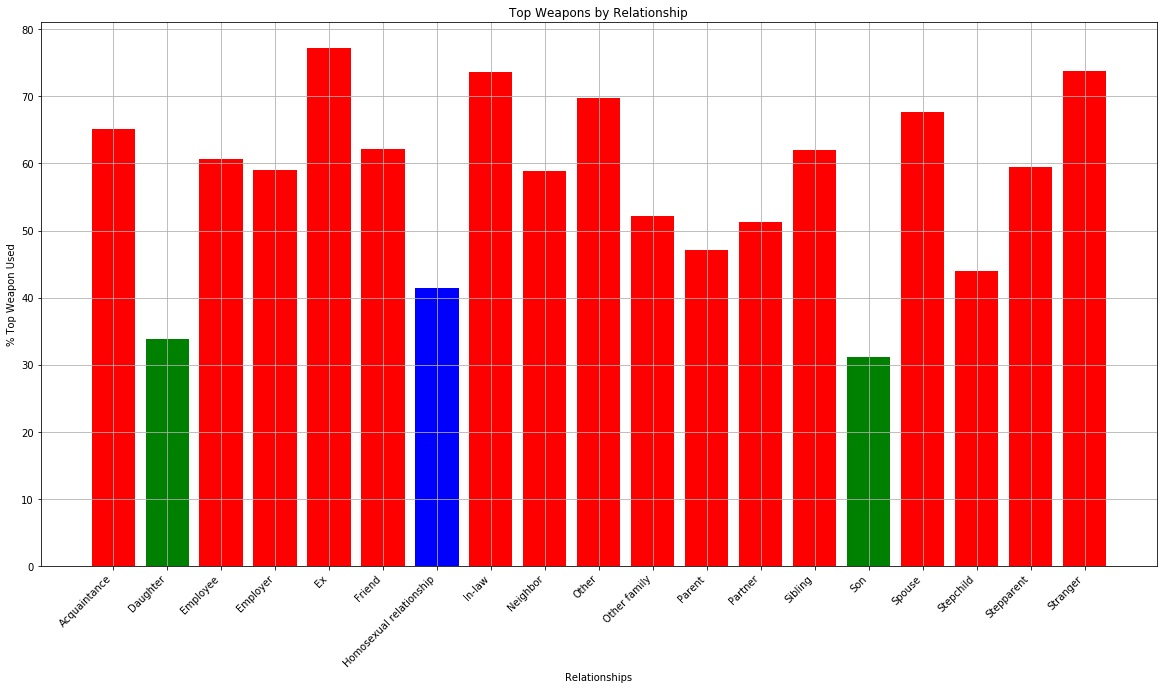

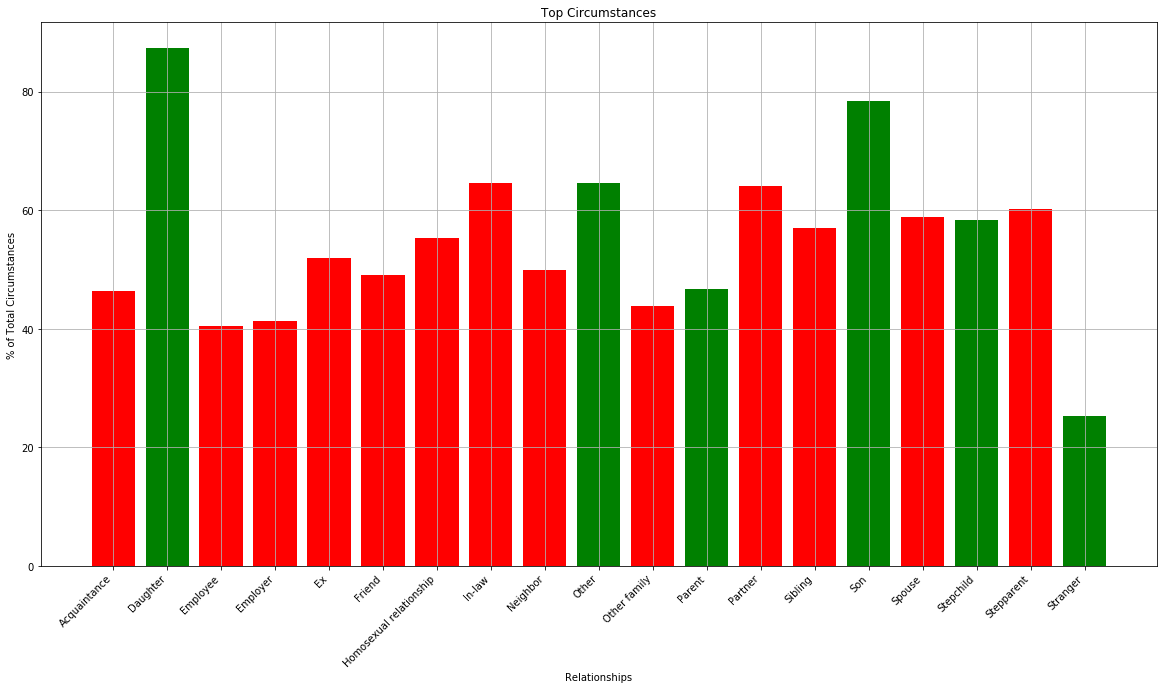

In [30]:
Relationships = data_stack_2.index

plt.figure(figsize = (20,10))
plt.title("Top Weapons by Relationship")
plt.xlabel("Relationships")
plt.ylabel("% Top Weapon Used")
plt.xticks(rotation=45, ha="right")
plt.grid()
colors = {'Gun':'red', 'Personal weapons, includes beating':'green', 'Knife or cutting instrument':'blue'}
colors = data_stack_2['Top Weapon'].apply(lambda x: colors[x])

plt.bar(Relationships, percent_weapon, color=colors, align="center")


plt.figure(figsize = (20,10))
plt.title("Top Circumstances")
plt.xlabel("Relationships")
plt.ylabel("% of Total Circumstances")
plt.xticks(rotation=45, ha="right")
plt.grid()
colors = {'Arguments':'red', 'Other':'green'}
colors = data_stack_2['Top Circ'].apply(lambda x: colors[x])

plt.bar(Relationships, percent_circs, color=colors, align="center")

In [31]:
circumstance_df = murder_df.groupby(['Circumstance']).size().reset_index(name='total by circ')
circumstance_df

,Circumstance,total by circ
0,Abortion,10
1,Arguments,217127
2,Arson,4630
3,Child killed by babysitter,1275
4,Drug & Alcohol Related,50055
5,Felon killed by police,16555
6,Felon killed by private citizen,12725
7,Gambling,1078
8,Gang Related,28891
9,Gun Negligence,5664


In [32]:
#Removing "Other" circumstance 
circumstance_update = circumstance_df.drop([12], axis=0)
circumstance_update

,Circumstance,total by circ
0,Abortion,10
1,Arguments,217127
2,Arson,4630
3,Child killed by babysitter,1275
4,Drug & Alcohol Related,50055
5,Felon killed by police,16555
6,Felon killed by private citizen,12725
7,Gambling,1078
8,Gang Related,28891
9,Gun Negligence,5664


In [33]:
total_circs = circumstance_update["total by circ"].sum()
total_circs

426185

In [34]:
circumstance_percentage = circumstance_update["total by circ"]/total_circs*100
circumstance_update["% of Total Circumstances"] = circumstance_percentage
circumstance_update

,Circumstance,total by circ,% of Total Circumstances
0,Abortion,10,0.002346
1,Arguments,217127,50.946655
2,Arson,4630,1.086383
3,Child killed by babysitter,1275,0.299166
4,Drug & Alcohol Related,50055,11.744900
5,Felon killed by police,16555,3.884463
6,Felon killed by private citizen,12725,2.985793
7,Gambling,1078,0.252942
8,Gang Related,28891,6.778981
9,Gun Negligence,5664,1.329000


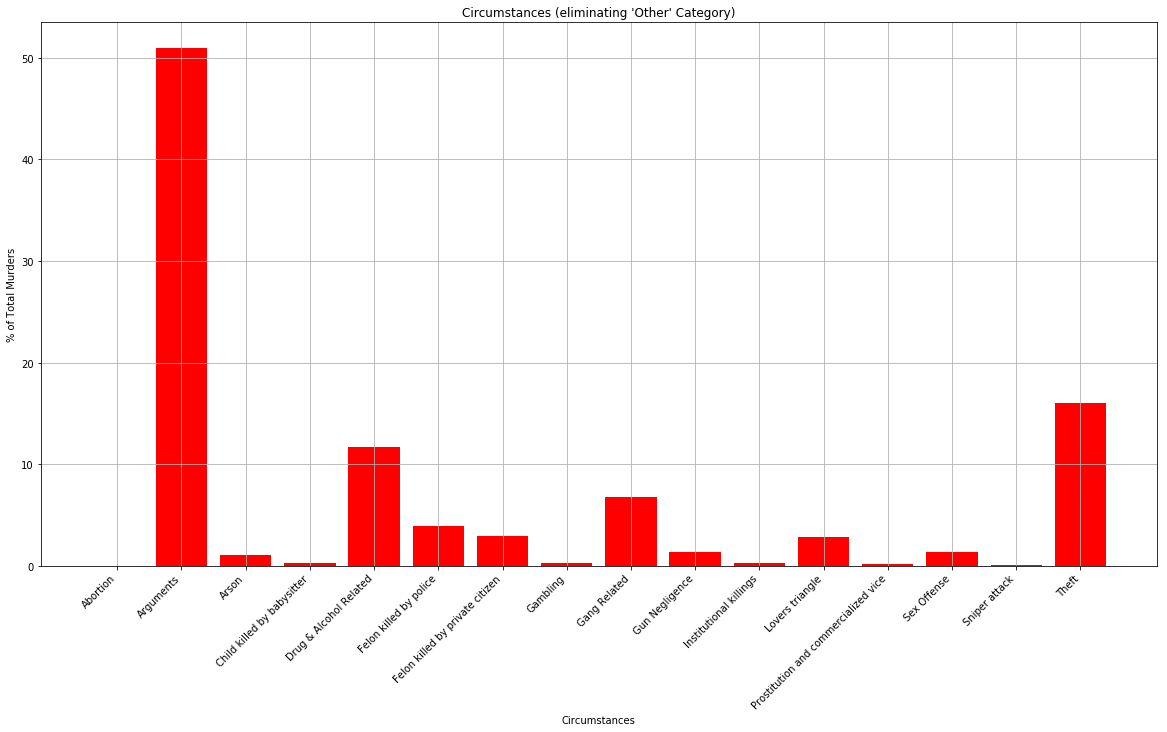

In [42]:
Circumstance = circumstance_update.Circumstance
circ_percent = circumstance_update["% of Total Circumstances"]

plt.figure(figsize = (20,10))
plt.title("Circumstances (eliminating 'Other' Category)")
plt.xlabel("Circumstances")
plt.ylabel("% of Total Murders")
plt.xticks(rotation=45, ha="right")
plt.bar(Circumstance, circ_percent, color="r", align="center")
plt.grid()

In [ ]:
#Most common weapon used, regardless of relationship, is a gun.
#Homicide committed by progeny are mostly done with personal weapons (which includes beating)